<a href="https://colab.research.google.com/github/danial-001/HTML-only-Resume-CV-/blob/main/LAB_07_(23_10_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

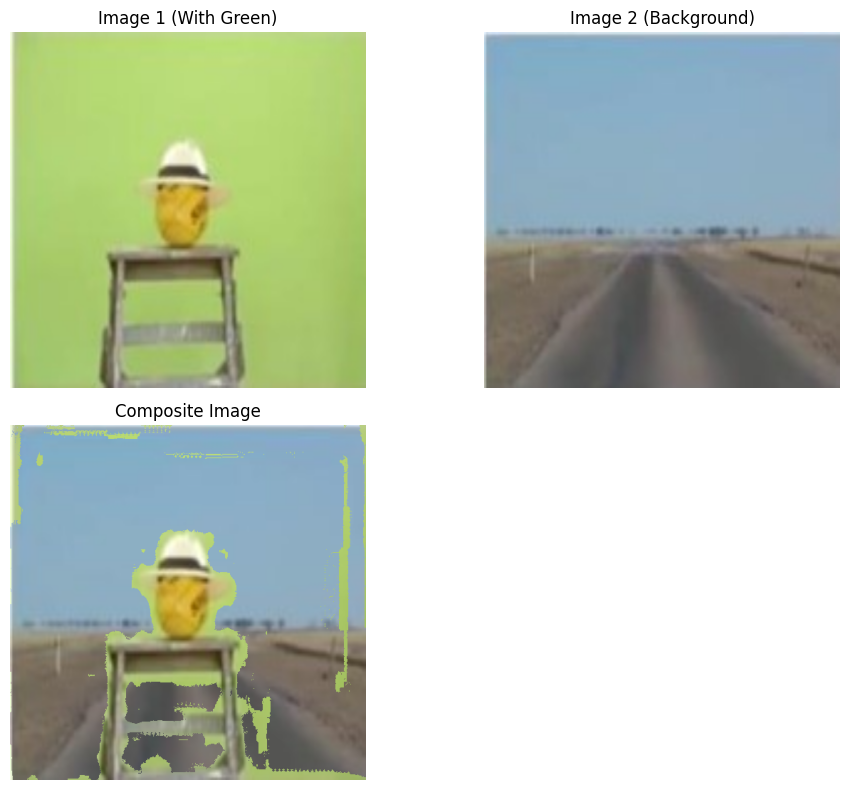

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image1_path = '/content/pic1.jpg'  # Replace with your first image path
image2_path = '/content/pic2.jpg'  # Replace with your second image path

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Convert BGR to RGB for displaying
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Resize both images to the same size
image1_rgb = cv2.resize(image1_rgb, (500, 500))
image2_rgb = cv2.resize(image2_rgb, (500, 500))

# Convert the image to HSV color space to easily identify green pixels
hsv_image = cv2.cvtColor(image1_rgb, cv2.COLOR_RGB2HSV)

# Define the range for green color in HSV
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

# Create a mask for the green pixels
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Invert the mask to get non-green areas
mask_inv = cv2.bitwise_not(mask)

# Use the mask to extract the non-green parts of image1
image1_non_green = cv2.bitwise_and(image1_rgb, image1_rgb, mask=mask_inv)

# Use the inverse mask to extract the corresponding parts from image2
image2_background = cv2.bitwise_and(image2_rgb, image2_rgb, mask=mask)

# Combine the two to create the composite image
composite_image = cv2.add(image1_non_green, image2_background)

# Plot the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image1_rgb)
plt.title("Image 1 (With Green)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image2_rgb)
plt.title("Image 2 (Background)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(composite_image)
plt.title("Composite Image")
plt.axis('off')

plt.tight_layout()
plt.show()


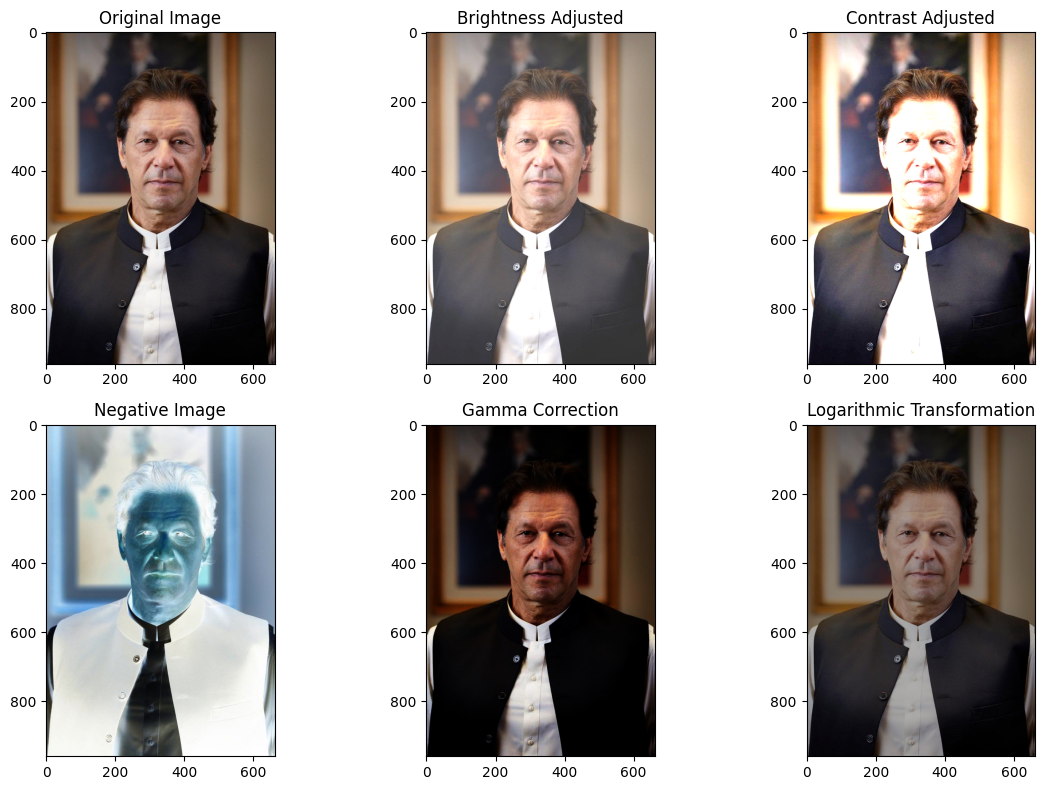

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Imran-Khan-PM.jpg'  # Replace with your image path
img = cv2.imread(image_path)

# 1. Changing Data Type (uint8 to double)
img_double = img.astype(np.float64) / 255.0

# 2. Brightness Adjustment (Offsetting pixel values)
brightness_offset = 50
bright_image = cv2.add(img, np.ones(img.shape, dtype=np.uint8) * brightness_offset)

# 3. Contrast Adjustment (Multiplying pixel values by a constant)
contrast_factor = 2
contrast_image = cv2.convertScaleAbs(img, alpha=contrast_factor, beta=0)

# 4. Negative/Inverse Transformation
img_neg = cv2.bitwise_not(img)

# Negative transformation using float values between 0-1
img_neg_double = 1 - img_double

# 5. Gamma Correction / Power Law Transformation
gamma = 2.0  # Gamma value
img_gamma_corrected = np.power(img_double, gamma)

# Alternatively, using cv2's LUT for gamma correction
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_corrected_image = adjust_gamma(img, gamma)

# 6. Logarithmic Transformation
c = 1  # Constant for scaling
img_log = c * np.log1p(img_double)

# Display the results using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
plt.title('Contrast Adjusted')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB))
plt.title('Negative Image')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor((img_gamma_corrected * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Gamma Correction')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor((img_log * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Logarithmic Transformation')

plt.tight_layout()
plt.show()


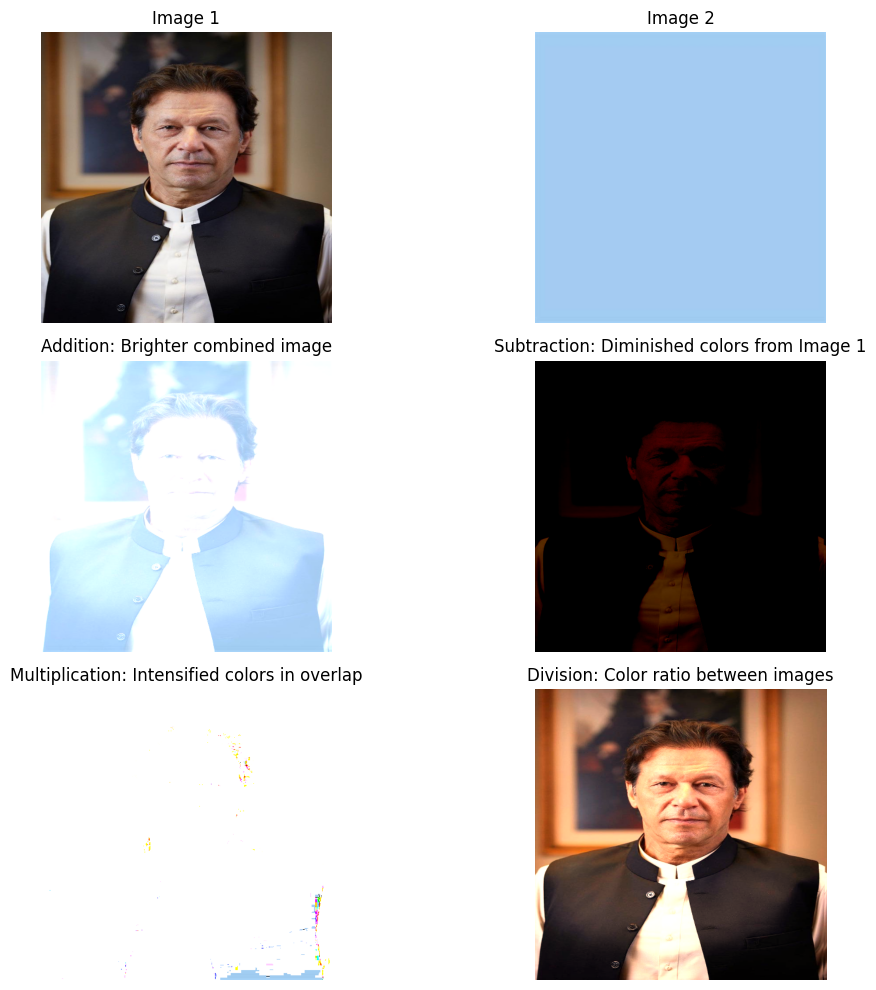

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image1_path = '/content/Imran-Khan-PM.jpg'  # Replace with your first image path
image2_path = '/content/pic3.jpg'  # Replace with your second image path

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Ensure both images are the same size
image1_rgb = cv2.resize(image1_rgb, (500, 500))
image2_rgb = cv2.resize(image2_rgb, (500, 500))

# Diadic operations
added_image = cv2.add(image1_rgb, image2_rgb)
subtracted_image = cv2.subtract(image1_rgb, image2_rgb)
multiplied_image = cv2.multiply(image1_rgb, image2_rgb)
divided_image = cv2.divide(image1_rgb, image2_rgb, scale=255)
# Plotting the results
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(image1_rgb)
plt.title("Image 1")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(image2_rgb)
plt.title("Image 2")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(added_image)
plt.title("Addition: Brighter combined image")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(subtracted_image)
plt.title("Subtraction: Diminished colors from Image 1")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(multiplied_image)
plt.title("Multiplication: Intensified colors in overlap")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(divided_image)
plt.title("Division: Color ratio between images")
plt.axis('off')

plt.tight_layout()
plt.show()

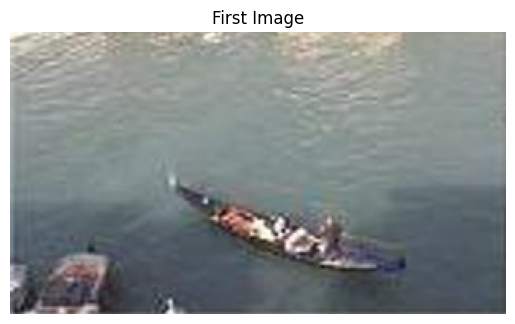

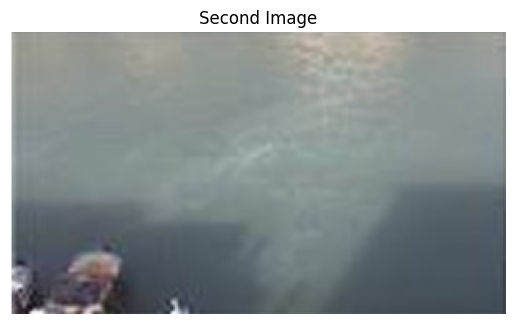

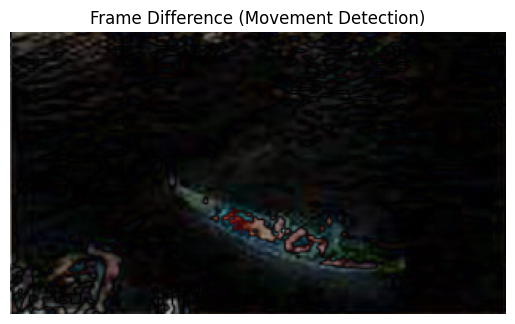

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images using matplotlib
def display_image(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load two images
img1 = cv2.imread('/content/frame1.jpg')  # Replace with your image path
img2 = cv2.imread('/content/frame2.jpg')  # Replace with your second image path

# Ensure both images are the same size by resizing
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Check if images are loaded properly
if img1 is None or img2 is None:
    print("Error: One or both images could not be loaded.")
    exit()

# Display the original images
display_image('First Image', img1)
display_image('Second Image', img2)

## 1. Detection of movement in a scene through frame subtraction
frame_diff = cv2.absdiff(img1, img2)  # Absolute difference between the frames
display_image('Frame Difference (Movement Detection)', frame_diff)